In [1]:
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
import numpy as np

In [2]:
X, Y = datasets.load_iris(return_X_y=True)

In [3]:
print(Y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [4]:
print(X)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [5]:
I12 = (Y == 1) | (Y == 2)
# print(I12)
X12 = X[I12]
Y12 = Y[I12]

In [6]:
np.putmask(Y12, Y12 == 1, 1)
np.putmask(Y12, Y12 == 2, -1)

In [7]:
print(Y12)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1]


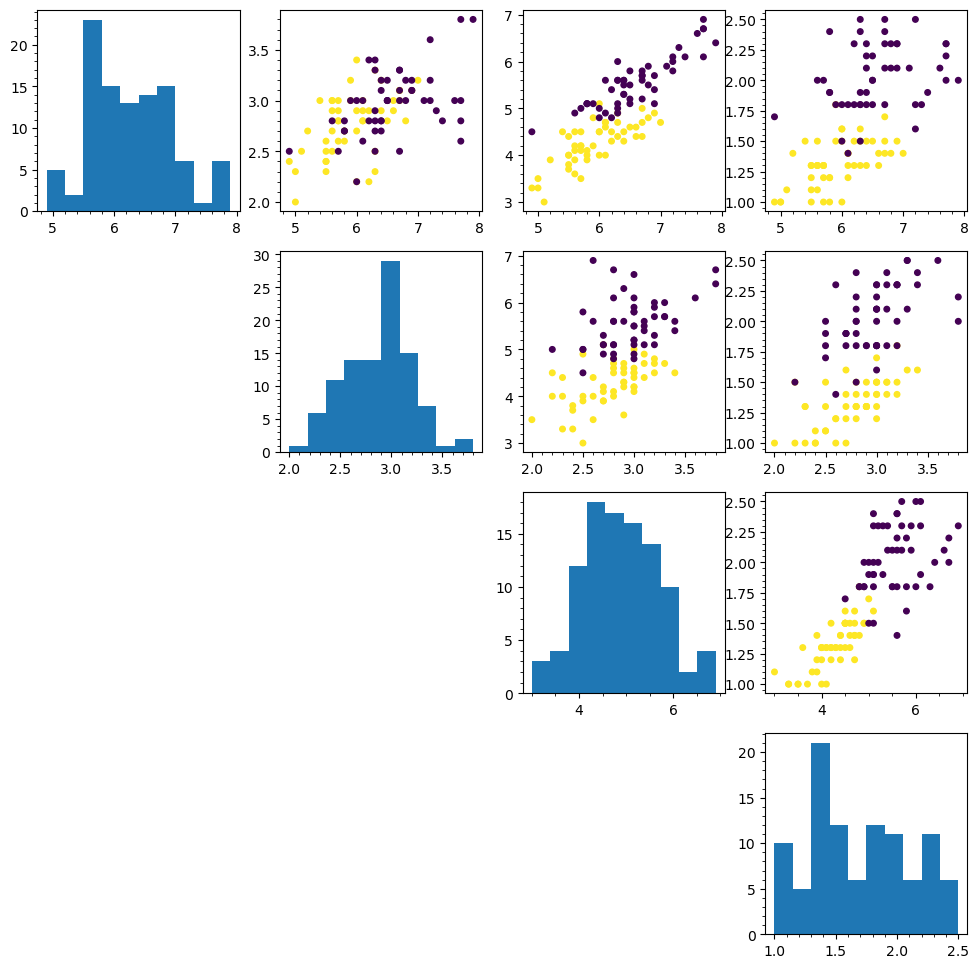

In [8]:
plt.figure(figsize=(12,12))
for i in range(4):
    for j in range(i,4):
        k = 4*i+j+1
        plt.subplot(4, 4, k)
        if i == j:
            plt.hist(X12[:,i])
        else:
            plt.scatter(X12[:,i], X12[:,j], c=Y12, s=16)
        plt.minorticks_on()
plt.show()

In [8]:
import mltools.funcs as funcs
import mltools.lossfuncs as lossfuncs
import mltools.models as models
import mltools.gda as gda
import mltools.risks as risks
import mltools.plots as plots
import mltools.scores as scores

In [25]:
hinge_func = funcs.Hinge()
loss_func = lossfuncs.MarginLoss(hinge_func)
linmod = models.LinearModel(4)
linmod.param[:] = np.random.random(5)
risk = risks.Risk(linmod, loss_func)

In [26]:
gd = gda.GradientDescent(risk, h=0.03)

In [37]:
gd.fit(X12, Y12)

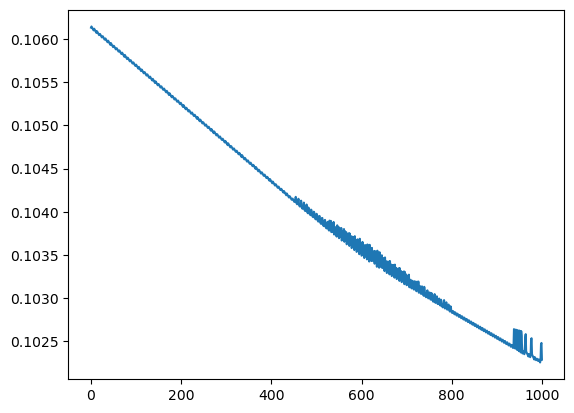

In [38]:
plt.plot(gd.rvals)
plt.show()

In [39]:
import sklearn.metrics as metrics

In [40]:
Y12_p = np.sign(linmod.evaluate(X12))

In [41]:
metrics.accuracy_score(Y12_p, Y12)

0.97

In [42]:
N = len(X12)
J12 = np.array([k for k in range(N) if Y12[k] != Y12_p[k]])
XJ12 = X12[J12]
YJ12 = Y12[J12]
print(J12)

[20 22 33]


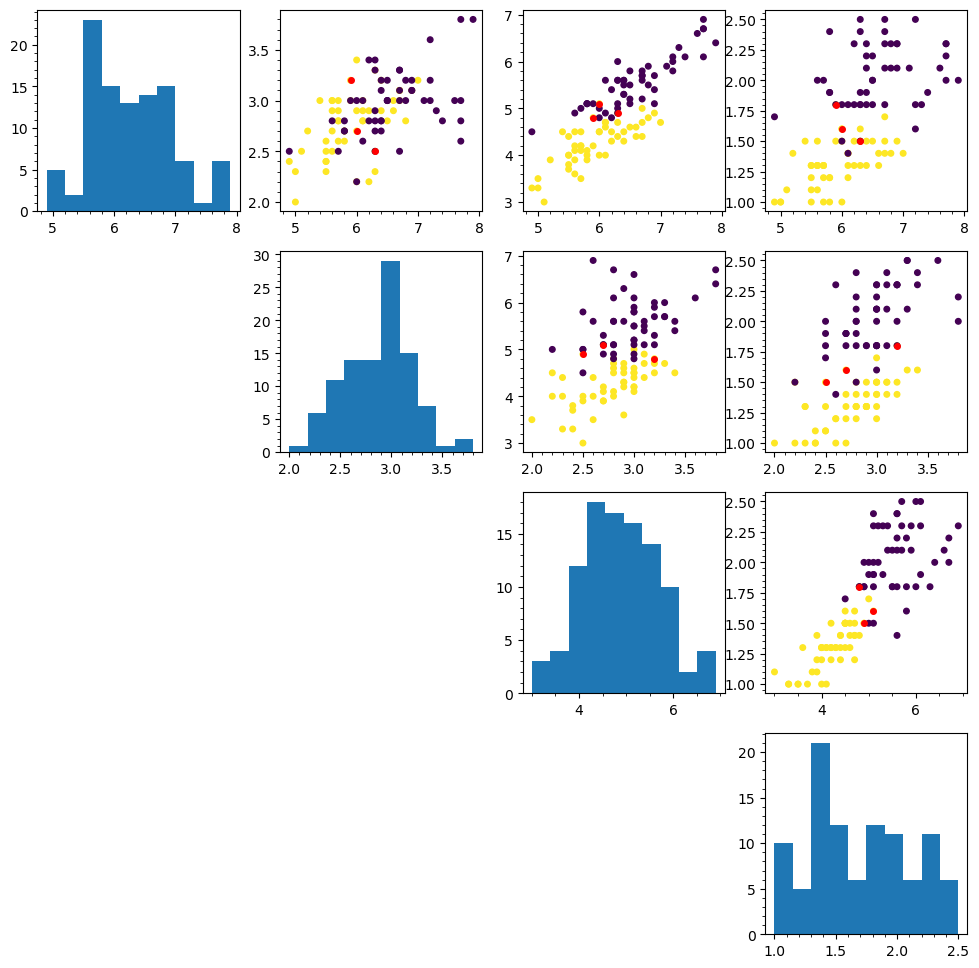

In [44]:
plt.figure(figsize=(12,12))
for i in range(4):
    for j in range(i,4):
        k = 4*i+j+1
        plt.subplot(4, 4, k)
        if i == j:
            plt.hist(X12[:,i])
        else:
            plt.scatter(X12[:,i], X12[:,j], c=Y12, s=16)
            plt.scatter(XJ12[:,i], XJ12[:,j], c='r', s=16)
        plt.minorticks_on()
plt.show()

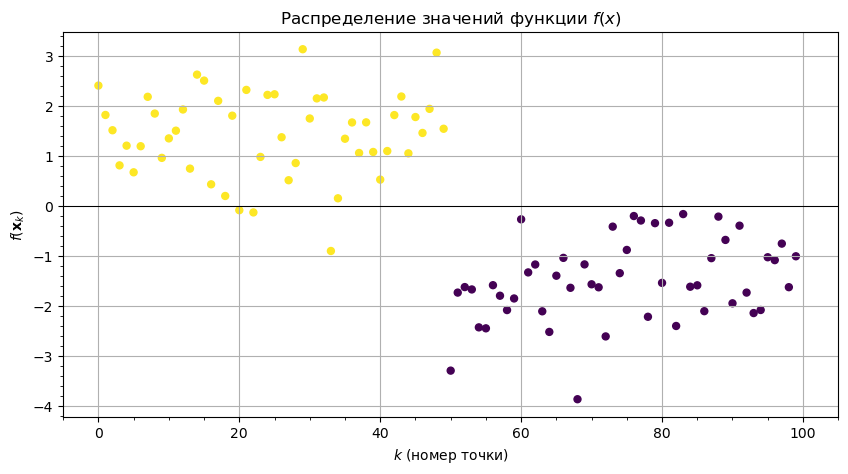

In [18]:
plt.figure(figsize=(10,5))
plots.plot_cls_function(linmod, X12, Y12)

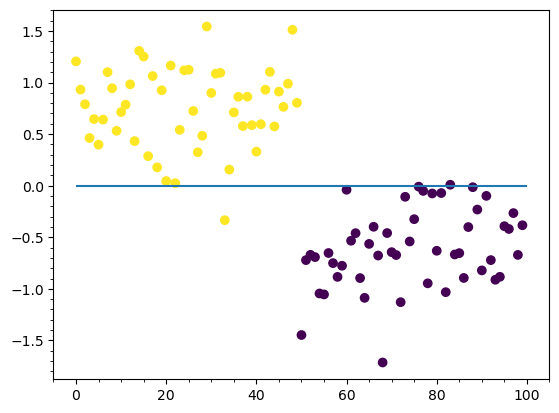

In [24]:
plt.scatter(range(len(Y12)), scores.modified_zscore(linmod.evaluate(X12)), c=Y12)
plt.hlines(0, 0, len(Y12))
plt.minorticks_on()